In [2]:
from drowsiness_detection.data import load_experiment_objects_nn
from drowsiness_detection.run_grid_search_experiment import load_experiment_data
from drowsiness_detection import config
from drowsiness_detection.models import build_lstm_model

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
experiment_id = 115
exp_config, best_estimator, search_results, history = load_experiment_objects_nn(
    experiment_id=experiment_id,
    log_dir="../logs/")
window_size = exp_config["window_in_sec"]
config.set_paths(30, window_size)

# load data
X_train, X_test, y_train, y_test, _ = load_experiment_data(
    exclude_by=exp_config["exclude_by"],
    num_targets=exp_config["num_targets"],
    seed=exp_config["seed"],
    test_size=exp_config["test_size"],
    split_by_subjects=exp_config["split_by_subjects"],
    use_dummy_data=exp_config["use_dummy_data"],
    nn_experiment=exp_config["nn_experiment"],
    feature_col_indices=exp_config["feature_col_indices"])


loading from experiment with id:  115
X_train shape: (25642, 1800, 7), y_train shape: (25642,)
X_test shape: (6494, 1800, 7), y_test shape: (6494,)


In [4]:
model = build_lstm_model(input_shape=(20,1800,7), lstm_units=42, learning_rate=0.02, dropout_rate=0.5, num_lstm_layers=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1800, 7)]         0         
                                                                 
 lstm (LSTM)                 (None, 42)                8400      
                                                                 
 flatten (Flatten)           (None, 42)                0         
                                                                 
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 1)                 43        
                                                                 
Total params: 8,443
Trainable params: 8,443
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
history_obj = model.fit(X_train, y_train, batch_size=40, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
642/642 [==============================] - 340s 529ms/step - loss: 0.6223 - accuracy: 0.6699 - val_loss: 0.6854 - val_accuracy: 0.5719
Epoch 2/5
642/642 [==============================] - 334s 520ms/step - loss: 0.6155 - accuracy: 0.6676 - val_loss: 0.6992 - val_accuracy: 0.5722
Epoch 3/5
642/642 [==============================] - 2087s 3s/step - loss: 0.6193 - accuracy: 0.6634 - val_loss: 0.6842 - val_accuracy: 0.5576
Epoch 4/5
642/642 [==============================] - 326s 508ms/step - loss: 0.6057 - accuracy: 0.6849 - val_loss: 0.7368 - val_accuracy: 0.5674
Epoch 5/5
642/642 [==============================] - 327s 509ms/step - loss: 0.6080 - accuracy: 0.6850 - val_loss: 0.7419 - val_accuracy: 0.5608


In [7]:
history_obj.history


{'loss': [0.6222869157791138,
  0.6154911518096924,
  0.6192513108253479,
  0.605682909488678,
  0.6079771518707275],
 'accuracy': [0.669916570186615,
  0.6675766110420227,
  0.6633647680282593,
  0.6848919987678528,
  0.68504798412323],
 'val_loss': [0.6854428052902222,
  0.6991549134254456,
  0.6841892600059509,
  0.736807107925415,
  0.7419285178184509],
 'val_accuracy': [0.5719125270843506,
  0.572220504283905,
  0.5575916171073914,
  0.5674468874931335,
  0.5608253479003906]}

In [8]:
y_test_predicted = model.predict(X_test)


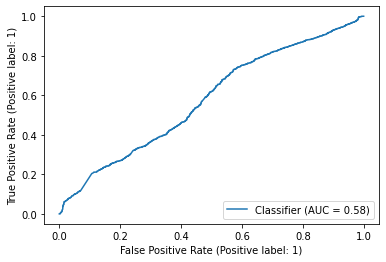

In [11]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_test_predicted)

In [10]:
model.save("../../logs/115/best_model/")


INFO:tensorflow:Assets written to: ../../logs/115/best_model/assets


INFO:tensorflow:Assets written to: ../../logs/115/best_model/assets
